In [1]:
import pandas as pd
import numpy as np

# Datos

In [2]:
df = pd.read_csv('base_final_lugares.csv')

# Modelo para restaurantes

In [4]:
df = df.copy()
df = df[df['tipo_lugar']=='Ecoturismo']

In [6]:
df.head(5)

,place_id,name,business_status,latitude,longitude,user_ratings_total,rating,website,price_level,photos,...,comida_norm,servicio_norm,ambiente_norm,satisfaccion_norm,actividades,naturaleza,familiar,actividades_norm,naturaleza_norm,familiar_norm
10,ChIJ196jq8T40YURiuJzqm1JMQY,Alameda de Santa María,OPERATIONAL,19.449673,-99.156902,18617.0,4.6,NaN,NaN,"[{'height': 4000, 'html_attributions': ['<a hr...",...,NaN,NaN,NaN,0.728571,0.0,11.0,5.0,0.000000,0.157143,0.071429
11,ChIJ1d-tcZUC0oUR5pEVJ_YZw-c,Parque Tezozómoc,OPERATIONAL,19.499859,-99.210754,19070.0,4.4,NaN,NaN,"[{'height': 3000, 'html_attributions': ['<a hr...",...,NaN,NaN,NaN,0.469880,18.0,25.0,18.0,0.216867,0.301205,0.216867
13,ChIJ24Pmcp8HzoUR12UoiDjCnrI,Rancho Mágico,OPERATIONAL,19.191489,-99.170153,2246.0,4.5,https://www.ranchomagico.com.mx/,NaN,"[{'height': 3024, 'html_attributions': ['<a hr...",...,NaN,NaN,NaN,1.113636,46.0,19.0,23.0,0.522727,0.215909,0.261364
43,ChIJ8Wls0Y_-zYURTqBshe3uSGs,San Nicolás Totolapan Ejido Park,OPERATIONAL,19.253492,-99.244858,3002.0,4.6,http://www.parquesannicolas.com/,NaN,"[{'height': 585, 'html_attributions': ['<a hre...",...,NaN,NaN,NaN,0.981481,42.0,73.0,27.0,0.388889,0.675926,0.250000
58,ChIJAUB80GzUzYURx8aRtasn4Cs,Skydive México - Paracaidismo Tequesquitengo,OPERATIONAL,18.648434,-99.264351,4012.0,4.8,http://www.skydivemexico.mx/,NaN,"[{'height': 534, 'html_attributions': ['<a hre...",...,NaN,NaN,NaN,1.287129,8.0,2.0,14.0,0.079208,0.019802,0.138614


In [8]:
#Columnas relevantes para modelo
df = df[['place_id', 'user_ratings_total', 'rating', 
                             'actividades_norm', 'naturaleza_norm', 'familiar_norm', 'satisfaccion_norm']]

In [9]:
df.describe()

,user_ratings_total,rating,actividades_norm,naturaleza_norm,familiar_norm,satisfaccion_norm
count,27.000000,27.000000,26.000000,26.000000,26.000000,26.000000
mean,14877.740741,4.548148,0.179476,0.308656,0.215399,0.909878
std,33930.711850,0.171801,0.139778,0.204666,0.112517,0.251431
min,1.000000,4.300000,0.000000,0.000000,0.031746,0.469880
25%,1793.000000,4.400000,0.083333,0.169444,0.126537,0.720186
50%,6850.000000,4.600000,0.123557,0.284862,0.215230,0.857822
75%,13905.000000,4.600000,0.227318,0.457223,0.277495,1.059406
max,179511.000000,5.000000,0.522727,0.702970,0.437500,1.466667


In [11]:
df.corr()

,user_ratings_total,rating,actividades_norm,naturaleza_norm,familiar_norm,satisfaccion_norm
user_ratings_total,1.000000,0.021313,0.123892,0.098713,0.139676,-0.333468
rating,0.021313,1.000000,0.075056,0.157173,0.038925,0.100284
actividades_norm,0.123892,0.075056,1.000000,0.494274,0.719657,0.159332
naturaleza_norm,0.098713,0.157173,0.494274,1.000000,0.567260,-0.186649
familiar_norm,0.139676,0.038925,0.719657,0.567260,1.000000,0.196840
satisfaccion_norm,-0.333468,0.100284,0.159332,-0.186649,0.196840,1.000000


In [12]:
df.isna().sum()

place_id              0
user_ratings_total    0
rating                0
actividades_norm      1
naturaleza_norm       1
familiar_norm         1
satisfaccion_norm     1
dtype: int64

In [13]:
columns_list = df.columns 

In [15]:
df_label = df[columns_list[0]]
df_variables = df[columns_list[1:]]

# Limpieza

In [16]:
# Imputar nulos
from sklearn.impute import KNNImputer

In [17]:
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# fit on the dataset
imputer.fit(df_variables)
# transform the dataset
df_imputed = imputer.transform(df_variables)

In [18]:
df_imputed_final = pd.DataFrame(df_imputed, columns=[columns_list[1:]])

In [19]:
# Escalar valores
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_imputed_scaled = scaler.fit_transform(df_imputed_final)

In [20]:
df_final = pd.DataFrame(df_imputed_scaled, columns=[columns_list[1:]])

# Clusterización

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

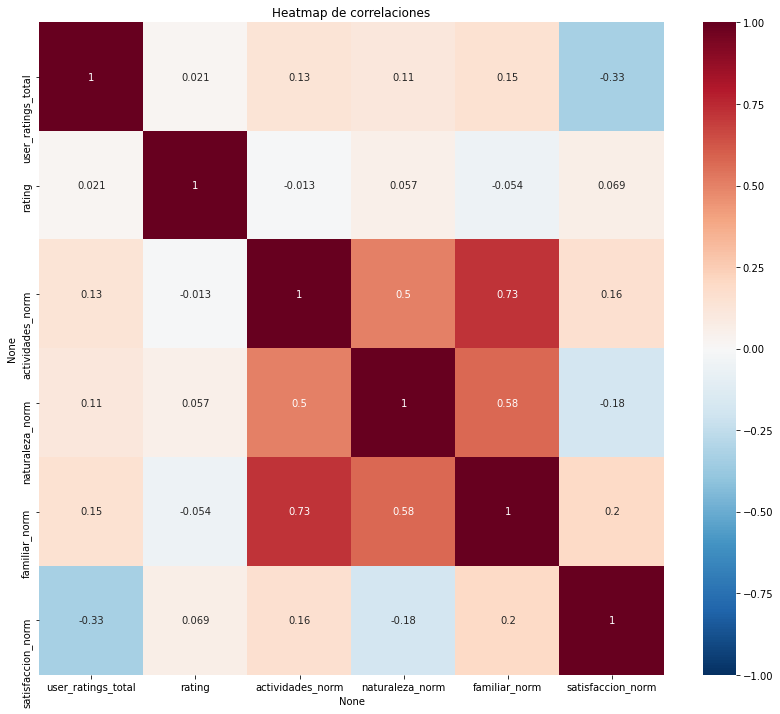

In [23]:
correlation = df_final.corr()
#display(correlation)
plt.figure(figsize=(14, 12))

heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.title('Heatmap de correlaciones')
plt.show()

In [24]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [25]:
df_final.columns

MultiIndex([('user_ratings_total',),
            (            'rating',),
            (  'actividades_norm',),
            (   'naturaleza_norm',),
            (     'familiar_norm',),
            ( 'satisfaccion_norm',)],
           )

In [26]:
# Variables para clusterizar
x = ['actividades_norm', 'naturaleza_norm', 'familiar_norm']

In [27]:
clusters = df_final.copy()
clusters = clusters[x]

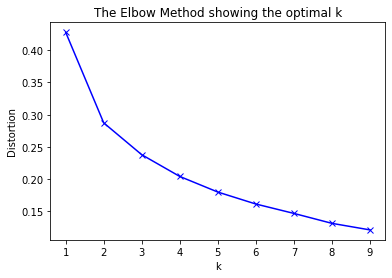

In [28]:
mat = clusters.values

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(mat)
    kmeanModel.fit(mat)
    distortions.append(sum(np.min(cdist(mat, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / mat.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [29]:
## Unsupervised method
kmeans = KMeans(n_clusters=4, random_state=0).fit(mat)
# Get cluster assignment labels
labels = kmeans.labels_
# Format results as a DataFrame
df_final['cluster'] = labels.T.tolist()

In [31]:
#Guardar resultados
df_final.to_csv('knn_ecoturismo_results.csv', index=False)

In [32]:
df_results = pd.read_csv('knn_ecoturismo_results.csv')

In [33]:
df_results.groupby('cluster').describe().T

cluster                           0          1         2         3
user_ratings_total count  11.000000  11.000000  2.000000  3.000000
                   mean    0.146955   0.025083  0.060395  0.074798
                   std     0.284405   0.034529  0.067725  0.101110
                   min     0.003014   0.000000  0.012506  0.016127
                   25%     0.051911   0.001242  0.036451  0.016422
                   50%     0.068314   0.007459  0.060395  0.016718
                   75%     0.086299   0.031736  0.084339  0.104133
                   max     1.000000   0.103705  0.108284  0.191549
rating             count  11.000000  11.000000  2.000000  3.000000
                   mean    0.311688   0.376623  0.285714  0.476190
                   std     0.228734   0.308206  0.000000  0.082479
                   min     0.000000   0.000000  0.285714  0.428571
                   25%     0.142857   0.142857  0.285714  0.428571
                   50%     0.285714   0.428571  0.285714  0.428571
                   75%     0.428571   0.500000  0.285714  0.500000
                   max     0.714286   1.000000  0.285714  0.571429
actividades_norm   count  11.000000  11.000000  2.000000  3.000000
                   mean    0.333141   0.127506  0.948370  0.702440
                   std     0.115529   0.064712  0.073016  0.083686
                   min     0.159420   0.000000  0.896739  0.606113
                   25%     0.236369   0.082778  0.922554  0.675037
                   50%     0.347826   0.151030  0.948370  0.743961
                   75%     0.422168   0.169736  0.974185  0.750604
                   max     0.512775   0.207940  1.000000  0.757246
naturaleza_norm    count  11.000000  11.000000  2.000000  3.000000
                   mean    0.573273   0.168176  0.309159  0.955144
                   std     0.125468   0.128560  0.002858  0.048366
                   min     0.381977   0.000000  0.307138  0.903903
                   25%     0.486291   0.040079  0.308149  0.932716
                   50%     0.563087   0.205893  0.309159  0.961528
                   75%     0.677754   0.258662  0.310169  0.980764
                   max     0.787228   0.351450  0.311180  1.000000
familiar_norm      count  11.000000  11.000000  2.000000  3.000000
                   mean    0.530915   0.206488  0.782952  0.769542
                   std     0.197336   0.126408  0.306953  0.200965
                   min     0.229829   0.000000  0.565904  0.537897
                   25%     0.436449   0.130197  0.674428  0.705657
                   50%     0.507090   0.217782  0.782952  0.873417
                   75%     0.661218   0.254180  0.891476  0.885364
                   max     0.859360   0.473041  1.000000  0.897311
satisfaccion_norm  count  11.000000  11.000000  2.000000  3.000000
                   mean    0.357803   0.455024  0.719459  0.499873
                   std     0.257076   0.254645  0.104124  0.118675
                   min     0.000000   0.213346  0.645832  0.375076
                   25%     0.202612   0.253918  0.682645  0.444163
                   50%     0.306616   0.399826  0.719459  0.513251
                   75%     0.455951   0.531829  0.756272  0.562272
                   max     0.801213   1.000000  0.793085  0.611292

In [37]:
import plotly.graph_objs as go # plotly graphical object
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 

In [35]:
df_results.columns

Index(['user_ratings_total', 'rating', 'actividades_norm', 'naturaleza_norm',
       'familiar_norm', 'satisfaccion_norm', 'cluster'],
      dtype='object')

In [41]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df_results, x='actividades_norm', y='naturaleza_norm', z='familiar_norm',
              color='cluster')
fig.show()